Training Deep Neural Networks 

In [3]:
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


Vanishing/Exploding Gradients Problems

In [4]:
def logit(z):
    return 1/(1+np.exp(-z))

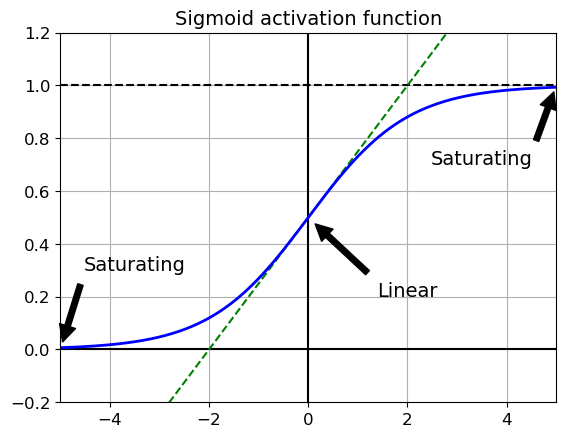

In [5]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0,0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z,logit(z), "b-", linewidth=2)
props = dict(facecolor="black", shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha='center')
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha='center')
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha='center')
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()




Xavier and He Initialization

In [6]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'IdentityInitializer',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'OrthogonalInitializer',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [7]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

<Dense name=dense, built=False>

In [8]:
init = keras.initializers.VarianceScaling(scale=2, mode="fan_avg", distribution="uniform")
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

<Dense name=dense_1, built=False>

NonSaturating Activation Functions

Leaky ReLu

In [9]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

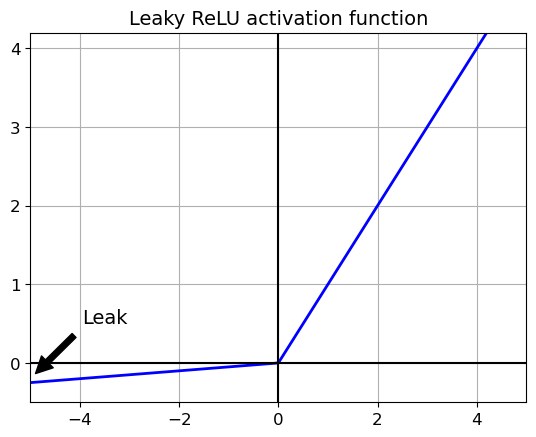

In [10]:
z= np.linspace(-5, 5, 200)

plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha='center')
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

In [11]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'hard_silu',
 'hard_swish',
 'leaky_relu',
 'linear',
 'log_softmax',
 'mish',
 'relu',
 'relu6',
 'selu',
 'serialize',
 'sigmoid',
 'silu',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [12]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

This is ReLU activation and its variants 

Train a neural network on Fashion MNIST using the leaky ReLU:

In [13]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full/255.0
X_test = X_test/255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [14]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6894 - loss: 0.9449 - val_accuracy: 0.8272 - val_loss: 0.5115
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8274 - loss: 0.4970 - val_accuracy: 0.8474 - val_loss: 0.4494
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8429 - loss: 0.4467 - val_accuracy: 0.8556 - val_loss: 0.4208
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8527 - loss: 0.4197 - val_accuracy: 0.8606 - val_loss: 0.4023
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8591 - loss: 0.4009 - val_accuracy: 0.8656 - val_loss: 0.3890
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8632 - loss: 0.3861 - val_accuracy: 0.8694 - val_loss: 0.3780
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8672 - loss: 0.3740 - val_accuracy: 0.8696 - val_loss: 0.3690
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8711 - loss: 0.3636 - 

Try PreLU:

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [19]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6714 - loss: 1.0149 - val_accuracy: 0.8306 - val_loss: 0.5135
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8276 - loss: 0.4933 - val_accuracy: 0.8498 - val_loss: 0.4497
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8462 - loss: 0.4382 - val_accuracy: 0.8592 - val_loss: 0.4182
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8563 - loss: 0.4087 - val_accuracy: 0.8622 - val_loss: 0.3994
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8633 - loss: 0.3882 - val_accuracy: 0.8656 - val_loss: 0.3853
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8679 - loss: 0.3725 - val_accuracy: 0.8688 - val_loss: 0.3740
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8716 - loss: 0.3596 - val_accuracy: 0.8724 - val_loss: 0.3645
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8753 - loss: 0.3481 - 

Better accuracy than ReLU is observed 

ELU

In [20]:
def elu(z, alpha=1):
    return np.where(z<0, alpha *(np.exp(z) - 1), z) 

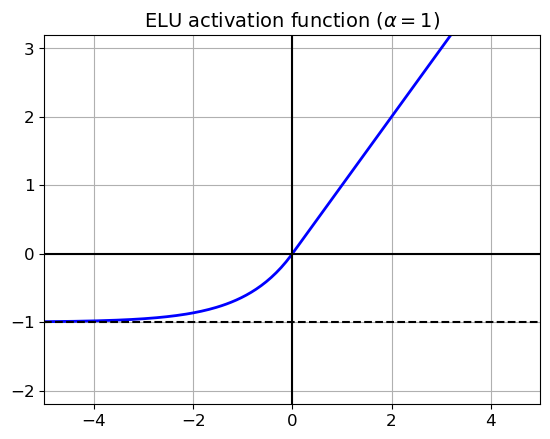

In [21]:
plt.plot(z, elu(z), "b-", linewidth = 2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], "k--")
plt.plot([0, 0], [-2.2, 3.2], "k-")
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In tensorflow when implementin ELU, just specify the activation function when building each layer:

In [22]:
keras.layers.Dense(10, activation="elu")

<Dense name=dense_8, built=False>

SELU

 During training, a neural network composed exclusively of a stack of dense layers using the SELU activation function and LeCun initialization will self-normalize: the output of each layer will tend to preserve the same mean and variance during training, which solves the vanishing/exploding gradients problem. This activation function outperforms the other activation functions very significantly for such neural nets.

create a neural net for Fashion MNIST with 100 hidden layers, using the SELU activation function

In [23]:
np.random.seed(42)
tf.random.set_seed(42)

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))

for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer = "lecun_normal"))


model.add(keras.layers.Dense(10, activation="softmax"))

In [25]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [26]:
#train the model 
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [27]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [28]:
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.1402 - loss: 2.2554 - val_accuracy: 0.1876 - val_loss: 2.0169
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.1329 - loss: 2.2138 - val_accuracy: 0.2200 - val_loss: 1.9058
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.2826 - loss: 1.7708 - val_accuracy: 0.3202 - val_loss: 1.6132
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3340 - loss: 1.6142 - val_accuracy: 0.3846 - val_loss: 1.5077
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3700 - loss: 1.5680 - val_accuracy: 0.3610 - val_loss: 1.4481


Attempt using ReLU and compare the results. This did not perform as expected 

Batch Normalization

In [29]:
model=keras.models.Sequential([
      keras.layers.Flatten(input_shape=[28, 28]),
      keras.layers.BatchNormalization(),
      keras.layers.Dense(300, activation="relu"),
      keras.layers.BatchNormalization(),
      keras.layers.Dense(100, activation="relu"),
      keras.layers.BatchNormalization(),
      keras.layers.Dense(10, activation="softmax")
  ])


In [30]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

From the model summary, you can see that each BN layer adds 4 parameters per input: γ, β, μ and σ (for example, the first BN layer adds 3136 parameters, which is 4 times 784). The last two parameters, μ and σ, are the moving averages, they are not affected by backpropagation, so Keras calls them “Non-trainable”(if you count the total number of BN parameters, 3136 + 1200 + 400, and divide by two, you get 2,368, which is the total number of non-trainable params in this model).

In [31]:
#look at the params of the first BN layer, two trainable and two are not

[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

when you create a BN layer in Keras, it also creates two operations that will be
called by Keras at each iteration during training. These operations will update the moving averages

In [32]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [33]:
history = model.fit(X_train,y_train, epochs=10, validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7616 - loss: 0.6972 - val_accuracy: 0.8664 - val_loss: 0.3852
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8608 - loss: 0.3955 - val_accuracy: 0.8764 - val_loss: 0.3535
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8792 - loss: 0.3412 - val_accuracy: 0.8814 - val_loss: 0.3378
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8932 - loss: 0.3030 - val_accuracy: 0.8848 - val_loss: 0.3316
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9063 - loss: 0.2710 - val_accuracy: 0.8840 - val_loss: 0.3283
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9171 - loss: 0.2430 - val_accuracy: 0.8846 - val_loss: 0.3291
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9275 - loss: 0.2181 - val_accuracy: 0.8844 - val_loss: 0.3323
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9367 - loss: 0.1950 - 

Sometimes applying BN before the activation function works better(debatable). The layer befor ethe BatchNormalization layer does not need to have bias terms since the BatchNormalization has some. Set use_bias=False when creaing those layers. 

In [34]:
model = keras.models.Sequential([
      keras.layers.Flatten(input_shape=[28, 28]),
      keras.layers.BatchNormalization(),
      keras.layers.Dense(300, use_bias=False),
      keras.layers.BatchNormalization(),
      keras.layers.Activation("relu"), 
      keras.layers.Dense(100, use_bias=False),
      keras.layers.Activation("relu"),
      keras.layers.Dense(10, activation="softmax")
  ])

In [35]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [36]:
history = model.fit(X_train,y_train,epochs=10, validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7317 - loss: 0.8012 - val_accuracy: 0.8598 - val_loss: 0.4020
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8490 - loss: 0.4249 - val_accuracy: 0.8740 - val_loss: 0.3609
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8662 - loss: 0.3740 - val_accuracy: 0.8792 - val_loss: 0.3426
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8782 - loss: 0.3415 - val_accuracy: 0.8818 - val_loss: 0.3316
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8873 - loss: 0.3163 - val_accuracy: 0.8822 - val_loss: 0.3250
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8953 - loss: 0.2948 - val_accuracy: 0.8836 - val_loss: 0.3220
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9025 - loss: 0.2758 - val_accuracy: 0.8846 - val_loss: 0.3221
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9091 - loss: 0.2587 - 

Gradient Clipping

Keras optimizers accept clipnorm or clipvalue arguments:

In [37]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [38]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

Reusing Pretrained Layers

Reusing a Keras model using fashion MNIST training set:
1. X_train_A = all item images except sandals and shirts (classes 5 and 6)
2. X_train_B = a much smaller training set of just the first 200 images of sandals and shirts 
3. Val set and test set are split this way but w/o restrictions
4. Train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B   (binary classification)
5. Transfer a little bit of knowledge from task A to task B, since classes in set A (sneakers, ankle boots, coats, t-shirts, etc.) are somewhat similar to classes in set B (sandals and shirts). However, since we are using Dense layers, only patterns that occur at the same location can be reused

In [39]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or not sandals
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved by 2
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a 6 or not?
    return (X[~y_5_or_6], y_A), (X[y_5_or_6], y_B)

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [40]:
X_train_A.shape

(43986, 28, 28)

In [41]:
X_train_B.shape

(200, 28, 28)

In [42]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [43]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [44]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation = "selu"))

model_A.add(keras.layers.Dense(8, activation="softmax"))

In [45]:
model_A.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [46]:
history = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8221 - loss: 0.5008 - val_accuracy: 0.8916 - val_loss: 0.3028
Epoch 2/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9009 - loss: 0.2784 - val_accuracy: 0.8944 - val_loss: 0.2864
Epoch 3/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9096 - loss: 0.2518 - val_accuracy: 0.9003 - val_loss: 0.2736
Epoch 4/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9160 - loss: 0.2354 - val_accuracy: 0.9026 - val_loss: 0.2637
Epoch 5/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9205 - loss: 0.2228 - val_accuracy: 0.9061 - val_loss: 0.2551
Epoch 6/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9238 - loss: 0.2125 - val_accuracy: 0.9088 - val_loss: 0.2495
Epoch 7/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9267 - loss: 0.2038 - val_accuracy: 0.9118 - val_loss: 0.2433
Epoch 8/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9294 - loss: 0.1965 - 

In [47]:
model_A.save("my_model.keras")

In [48]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))

model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [49]:
model_B.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [50]:
history = model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6786 - loss: 0.6377 - val_accuracy: 0.9767 - val_loss: 0.1288
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9931 - loss: 0.0810 - val_accuracy: 0.9828 - val_loss: 0.0900
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9931 - loss: 0.0525 - val_accuracy: 0.9848 - val_loss: 0.0726
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9931 - loss: 0.0383 - val_accuracy: 0.9858 - val_loss: 0.0627
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9931 - loss: 0.0298 - val_accuracy: 0.9868 - val_loss: 0.0564
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9931 - loss: 0.0243 - val_accuracy: 0.9878 - val_loss: 0.0520
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0202 - val_accuracy: 0.9888 - val_loss: 0.0490
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0172 - val_accuracy: 0.9888 - val_loss: 0.0466


In [51]:
model_B.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,803 (1.05 MB)

 Trainable params: 275,801 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [52]:
model_A = keras.models.load_model("my_model.keras")

model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

Note that model_A and model_B_on_A now share some layers. When you train model_B_on_A, it will also affect model_A. If you want to avoid that, you need to clone model_A before you reuse its layers. To do this, you must clone model A’s architecture,then copy its weights (since clone_model() does not clone the weights):

In [53]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [54]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [55]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.1121 - loss: 1.9878 - val_accuracy: 0.5751 - val_loss: 0.7515
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6344 - loss: 0.6252 - val_accuracy: 0.8560 - val_loss: 0.3538
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8836 - loss: 0.3042 - val_accuracy: 0.9290 - val_loss: 0.2278
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9470 - loss: 0.1974 - val_accuracy: 0.9523 - val_loss: 0.1702
Epoch 1/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9796 - loss: 0.1261 - val_accuracy: 0.9899 - val_loss: 0.0826
Epoch 2/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9931 - loss: 0.0616 - val_accuracy: 0.9929 - val_loss: 0.0586
Epoch 3/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9931 - loss: 0.0424 - val_accuracy: 0.9939 - val_loss: 0.0470
Epoch 4/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9931 - loss: 0.0325 - val_accuracy: 0.9939 - val_loss: 0.0402
Epoc

In [56]:
model_B.evaluate(X_test_B, y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9930 - loss: 0.0246


[0.027608223259449005, 0.9919999837875366]

In [57]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9963 - loss: 0.0171


[0.016771866008639336, 0.996999979019165]

In [58]:
(100-99.65)/(100-99.60)

0.8749999999999734

Learning Rate Scheduling

lr =lr0/(1+steps/s)**c
    - keras uses c=1 and s = 1/decay

In [59]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay = 1e-4)

c:\Users\user\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [60]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [61]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7905 - loss: 0.5980 - val_accuracy: 0.8622 - val_loss: 0.3986
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8634 - loss: 0.3824 - val_accuracy: 0.8710 - val_loss: 0.3736
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8759 - loss: 0.3470 - val_accuracy: 0.8742 - val_loss: 0.3554
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8836 - loss: 0.3237 - val_accuracy: 0.8786 - val_loss: 0.3462
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8908 - loss: 0.3054 - val_accuracy: 0.8804 - val_loss: 0.3403
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8959 - loss: 0.2903 - val_accuracy: 0.8796 - val_loss: 0.3371
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9007 - loss: 0.2771 - val_accuracy: 0.8810 - val_loss: 0.3348
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9057 - loss: 0.2654 - 

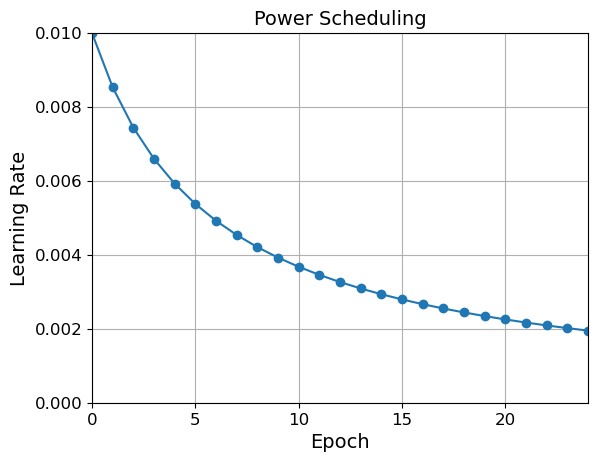

In [62]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

Exponential Scheduling

lr = lr0 * 0.1 **(epoch/s)

In [63]:
def exponential_decay_fn(epoch):
    return 0.01*0.1**(epoch/20)

In [64]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch/s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [65]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25 

In [66]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7546 - loss: 1.0035 - val_accuracy: 0.7956 - val_loss: 0.6486 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8146 - loss: 0.5914 - val_accuracy: 0.8232 - val_loss: 0.6633 - learning_rate: 0.0089
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8200 - loss: 0.6020 - val_accuracy: 0.8178 - val_loss: 0.6264 - learning_rate: 0.0079
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8287 - loss: 0.5562 - val_accuracy: 0.8448 - val_loss: 0.5899 - learning_rate: 0.0071
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8407 - loss: 0.5202 - val_accuracy: 0.8528 - val_loss: 0.5842 - learning_rate: 0.0063
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8505 - loss: 0.4874 - val_accuracy: 0.8430 - val_loss: 0.5268 - learning_rate: 0.0056
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8629 - l

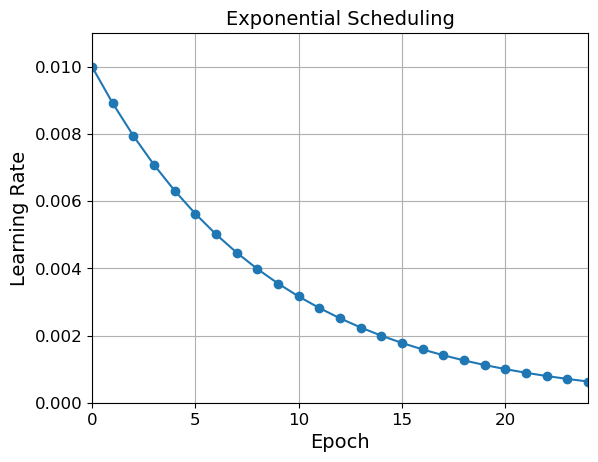

In [67]:
plt.plot(history.epoch,history.history["learning_rate"], "o-")
plt.axis([0, n_epochs-1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [68]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


Perfomance Scheduling

In [69]:
def schedule(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.5

In [70]:
lr_scheduler = keras.callbacks.LearningRateScheduler(schedule)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25 
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8036 - loss: 0.5713 - val_accuracy: 0.8722 - val_loss: 0.3583 - learning_rate: 0.0010
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8703 - loss: 0.3574 - val_accuracy: 0.8760 - val_loss: 0.3500 - learning_rate: 0.0010
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8875 - loss: 0.3116 - val_accuracy: 0.8764 - val_loss: 0.3538 - learning_rate: 0.0010
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8971 - loss: 0.2793 - val_accuracy: 0.8802 - val_loss: 0.3616 - learning_rate: 0.0010
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9059 - loss: 0.2601 - val_accuracy: 0.8760 - val_loss: 0.3716 - learning_rate: 0.0010
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9241 - loss: 0.2058 - val_accuracy: 0.8922 - val_loss: 0.3346 - learning_rate: 5.0000e-04
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9382

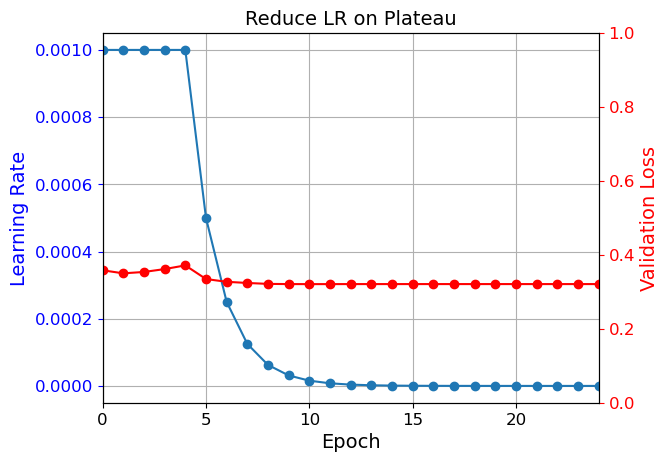

In [71]:
plt.plot(history.epoch, history.history["learning_rate"], "o-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color="blue")
plt.tick_params("y", colors="blue")
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "o-", color="red")
ax2.set_ylabel("Validation Loss", color="red")
ax2.tick_params("y", colors="red")
ax2.set_ylim(0, 1)
plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [72]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


Avoid overfitting through Regularization

l1 and l2 regularization

In [73]:
layer = keras.layers.Dense(100, activation = "elu", kernel_initializer = "he_normal", kernel_regularizer = keras.regularizers.l2(0.01))

In [74]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs= n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7969 - loss: 3.1108 - val_accuracy: 0.8468 - val_loss: 0.5854
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8318 - loss: 0.6095 - val_accuracy: 0.8538 - val_loss: 0.5595


You will typically want to apply the same regularizer to all layers in your network, as well as the same activation function and the same initialization strategy in all hidden layers, you may find yourself repeating the same arguments over and over, making it ugly and error-prone. To avoid this, you can use Python’s functools.partial() function which lets you create a thin wrapper for any callable, with some default argument values

In [75]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs= n_epochs,
                    validation_data=(X_valid_scaled, y_valid))


Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7972 - loss: 3.2441 - val_accuracy: 0.8358 - val_loss: 0.7107
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8230 - loss: 0.7288 - val_accuracy: 0.8426 - val_loss: 0.6850


DropOut

In [78]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer = "he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation ="elu", kernel_initializer = "he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation = "softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer= "nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs= n_epochs, validation_data =(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7585 - loss: 0.7514 - val_accuracy: 0.8658 - val_loss: 0.3720
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8399 - loss: 0.4326 - val_accuracy: 0.8684 - val_loss: 0.3485


Alpha DropOut

To regularize a self-normalizing network based on the SELU activation function (as discussed earlier), you should use AlphaDropout: this is a variant of dropout that preserves the mean and standard deviation of its inputs

MC Dropout

If you are building a risk-sensitive application, or inference latency is not very important in your application, you can use MC Dropout to boost performance and get more reliable probability estimates, along with uncertainty estimates

In [81]:
y_probas = np.stack([model(X_test_scaled, training=True) for sample in range(100)])

y_proba = y_probas.mean(axis=0)
y_std= y_probas.std(axis=0)

Once we average over the first dimension (axis=0), we get y_proba, an array of
shape [10000, 10], like we would get with a single prediction. Averaging over multiple predictions with dropout on gives us a Monte Carlo estimate that is generally more reliable than the result of a single prediction with dropout off.

In [82]:
#look at the model’s prediction for the first instance in the test set, with dropout off:

np.round(model.predict(X_test_scaled[:1]),2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.1 , 0.  , 0.78]],
      dtype=float32)

In [83]:
#predictions made when dropout is activated:

np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.16, 0.  , 0.13, 0.  , 0.71]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.67, 0.  , 0.02, 0.  , 0.31]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.04, 0.  , 0.94]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.18, 0.  , 0.63]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.14, 0.  , 0.84]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.35, 0.  , 0.17, 0.  , 0.47]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.25, 0.  , 0.74]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.36, 0.  , 0.5 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.04, 0.  , 0.84]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.48, 0.  , 0.34]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.4 , 0.  , 0.06, 0.  , 0.53]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.57, 0.  , 0.39]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.57, 0.  , 0.31, 0.  , 0.12]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.06, 0.  , 0

apparently, when we activate dropout, the model is not sure anymore. It still seems to prefer class 9, but sometimes it hesitates with classes 5 (sandal) and 7 (sneaker), which makes sense given they’re all footwear

In [84]:
 #averaging over the first dimension, we get the following MC dropout predictions:

np.round(y_proba[:1], 2)


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.15, 0.  , 0.65]],
      dtype=float32)

In [85]:
y_std = y_probas.std(axis=0)

np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.15, 0.  , 0.24]],
      dtype=float32)

There’s quite a lot of variance in the probability estimates: if you were
building a risk-sensitive system (e.g., a medical or financial system), you should probably treat such an uncertain prediction with extreme caution. You definitely would not treat it like a 99% confident prediction. 

In [87]:
y_pred = np.argmax(y_proba, axis=1)

In [88]:
#find model's accuracy

accuracy = np.sum(y_pred == y_test)/len(y_test)

accuracy

0.8556

If your model contains other layers that behave in a special way during training (such
as Batch Normalization layers), then you should not force training mode. Instead, you should replace the Dropout layers with MCDropout.
We just subclass the Dropout layer and override the call() method to force its train
ing argument to True. Similarly, you could define an MCAlphaDrop out class by subclassing AlphaDropout instead. If you are creating a model from scratch, it’s just a matter of using MCDropout rather than Dropout.

In [89]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training = True)
    
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [90]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer for layer in model.layers
])

In [91]:
mc_model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics = ["accuracy"])

In [93]:
mc_model.set_weights(model.get_weights())

In [94]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.1 , 0.  , 0.78]],
      dtype=float32)